**To make the assignment, first run the code below to import the right libraries.**

In [17]:
# =================================
# Imports
# =================================
from PyCh import *
from numpy import random
from dataclasses import dataclass
from matplotlib import pyplot
import math

<h1><center> 4DC10. Intermediate assignment</center></h1>
<h2><center> Modeling and simulation of an autonomous vehicle storage and retrieval system</center></h2>
    
# 1 Subject

Today's competitive environment, in which deliveries need to be faster and order sizes become smaller, forces material handling providers to progressively develop new and better solutions. A recent development in automated material-handling technology for unit load storage and retrieval is the autonomous vehicle storage and retrieval system (AVS/RS). Figure 1 shows a representation of an AVS/RS for the handling of totes, while Figure 2 illustrates a single tier (floor, level). The storage racks are single-deep and double-sided. Each storage position is of the same size and can hold one tote. Lifts are mounted at fixed locations at one end of each storage aisle. The input/output (I/O) point is located at the first tier beside each lift. Autonomous vehicles are dedicated to a storage aisle within a specific tier (so-called tier-captive configuration). The first position on either side of the storage aisle in all tiers serves as a buffer and is used to manage the transfer of totes between vehicles and lifts (see Figure 2). One buffer (out) handles totes which have been retrieved, the other one (in), located on the other side of the storage aisle, handles the totes to be stored. The presence of these buffers allows the lift and vehicle to work independently of each other. 

The throughput performance of AVS/RS systems can be affected by design decisions (such as number of tiers, number of aisles, and depth of aisles) as well as operational decisions (such as tote storage location and order assignment).

Figure 1: AVS/RS with tier-captive configuration [1] | Figure 2: Single tier in AVS/RS [1]
- | - 
<img src="figures/avs.png" alt="drawing" width="400"/> | <img src="figures/avrs2.png" alt="drawing" width="400"/>




# 2 Goal
The goal of this assignment is to study this new material handling solution by using computer simulation. This study can be restricted to the retrieval process only, i.e., the vehicles perform only single retrieval cycles. Clearly, the retrieval phase is the most critical activity from an organisational viewpoint, as it is directly related to customer service level and &mdash; in contrast to the storage phase &mdash; it cannot be postponed to a period of low workload. 

The objectives of this assignment can be summarized as follows:
- Develop a simulation model of one aisle that consists of several tiers with retrieval process to assess the system performance in terms of throughput and flow time.
- Systematically develop the model process by process, and verify and validate each process using analytical results.
- Investigate design trade-offs, i.e., via different layouts (number of columns and tiers), for this material handling system.

# 3 Description of the AVS/RS
The AVS/RS is a fully automated system that can store and retrieve unit loads. The unit loads are placed in totes, a type of box, and these totes are placed in a designated aisle and column for storage. When retrieved, an autonomous vehicle places the totes in a buffer at the end of the aisle. There is one autonomous vehicle for every aisle within the tier. This is called the tier-captive configuration. From the buffer, the totes are picked by a lift that serves all tiers in one aisle, see Figure 2. In this assignment only one aisle that consists of $Levels$ tiers has to be modelled. Each aisle has depth number of columns of width $dv$ metres and height $dl$ metres.

Requests for a tote arrive for each tier, asking for a tote with a random (uniformly distributed) column assigned to it. The inter arrival time of requests is exponentially distributed with mean value $arrive$.

The vehicles transport totes along the aisle (one vehicle per tier). The time taken by the vehicle to process an order depends on the tote's location. The vehicle has to travel to this location, load the tote (it takes a fixed amount of time equal to $lv$ seconds), then go back to the end of the aisle and, finally, unload the tote to the buffer (again this takes $lv$ seconds). The speed profile of each vehicle is described as follows. First, the vehicle goes with a constant acceleration $av$ *m/s$^2$* until it reaches its maximum velocity $vmaxv$, then it moves with this velocity and decelerates with a constant deceleration $av$ to approach its destination point. If the tote is located too close to the end of the aisle, it is possible that the vehicle will not reach its maximum speed.

The vehicles unload the totes to a location where it is picked up by the lift. At any given time only one tote per tier is allowed to occupy such a position.

The lift transports the totes from every tier to the ground floor. The processing time depends on the tote's location and the fixed time to load and unload the tote ($ll$ seconds for loading and $ll$ seconds for unloading). The maximum speed of the lift is $vmaxl$ $m/s$ with a speed profile similar to that of the vehicles (constant acceleration/deceleration of $al$ *m/s<sup>2</sup>*).

# 4 Modeling of the AVS/RS
The model consists of several processes communicating via channels, see Figure 3.

| Figure 3: The processes in the model | 
- 
<img src="figures/avrs.png" alt="drawing" width="400"/> 

A brief description of the processes is given below:
- **G:** The generator models the arrival of orders for totes. There is one generator per tier.
- **DB:** The demand buffer stores the orders to be picked up by the vehicles. The vehicle processes the orders under first-come-first-serve policy. It can always receive a tote, but it releases a tote only when the vehicle is ready to pick it up.
- **V:** The vehicle can be modeled as a server with a variable processing time.
- **GDV:** The process consisting of a Generator, Demand Buffer and Vehicle for one tier of the AVS/RS system.
- **B:** The buffer stores the totes from the vehicles awaiting for a pick-up by the lift. The buffer operates under first-come-first-serve policy and has a finite capacity of $bc$ totes per tier. So, every tier has a buffer location of finite capacity of $bc$ totes. All those locations together form the buffer B that accommodates all the totes which are processed by the same lift. When the buffer is not empty (there is at least one tote on one of the tiers), the buffer sends information about the tier of the longest waiting tote to the lift upon request. This information is used by the lift to determine the location of the tote (the number of the tier the tote is located in). Once the lift is ready to pick it up, the tote is released to the lift. There are two types of queues in the buffer: $xs$ contains all the totes to be picked up by the lift and there are $Levels$ counters $n$ counting the totes from the corresponding tier.
- **L:** The lift, similar to the process **V**, is modeled as a machine with a variable processing time. A lift first receives a destination tier. Then the process delays for time required for the lift to go to the tote location and pick up the tote. Then it receives the tote, and next it delays for the time required to go to the ground floor and to unload the tote. After that the lift process is ready to release the tote to the Exit process.
- **E:** In the exit process all the data related to each tote are collected. This process calculates the average throughput and the average flow-time. The number of totes to be processed by the AVS/RS during one simulation run is determined by the constant $number\_of\_orders$.

# 5 Remark concerning report
The assignment must be handed in two ways: a report in PDF with the answers to each question, as well as this jupyter notebook file. The report has to contain concise answers to the questions posed. Avoid unnecessary long explanations, however answers to analytical questions without an argument will result in no points. Include all important python code in your report, but only include code of the processes you have modified (e.g. the Generator process in Exercise 6.1.b). Failing to submit both the PDF and notebook files will result in a point reduction. 

Note that some of the simulations in the last few exercises can take some time to run, so plan accordingly.


# 6 Assignment
When making a PyCh specification, one does not build an entire model and then starts debugging. A model is build step by step. During each step proper functionality is checked. We therefore model one process at a time, and connect the process with a Generator and/or Exit process to test proper functionality. In order to test proper functionality we first use analytical methods to determine the expected outcome. Then we run simulations to verify if these outcomes are indeed obtained. If that is the case, we can be more convinced that the process has been modeled correctly.

**Warning: printing millions of lines of text can cause problems when opening your jupyter notebook file. If necessary, try printing every 1000th line instead of every line.**

## 6.1 Exercise 1: Generator (5 points)
So the first step is to write a proper generator for a tier. To that end, the first model we build consists of (only) a Generator process and an Exit process collecting the totes generated by the Generator. The inter arrival time of requests is exponentially distributed with mean $arrive$. The requested tote should be retrieved from a random (uniformly distributed) column, where there are $depth$ columns in total (the columns ranging from 0 till 54).

a. Determine (analytically) the throughput and flow time that should result from your model with only the generator process and the exit process.

$flow \ time = 0$, because no processing is done to orders, they are directly handed over to the exit process
Therefore the following holds for the throughput:
$$ throughput = 1 / mean \ inter \ arrival \ time  = 1 / arrive$$
For the code below, that results in the following value
$$ throughput = 1 / 70 \approx 0.01429 \ per \ unit \ time $$


b. Complete the Generator code in the template below. Confirm that your simulations produce the correct throughput and flow time, and that the minimal and maximal column returned by your simulation are respectively 0 and 54.

In [18]:
# =================================
# Tote
# =================================
@dataclass
class Tote:
    entrytime: float = 0.0
    column: int = 0

# =================================
# Generator
# =================================
@process
def Generator(env, c_out, arrive, depth):
    depth_distr = lambda: random.randint(0,depth)
    distribution = lambda : random.exponential(arrive)

    while True:
        x = Tote(entrytime = env.now, column = depth_distr() )
        yield env.execute(c_out.send(x))

        delay = distribution()
        yield env.timeout(delay)

# =================================
# Exit
# =================================
@process
def Exit(env, c_in, number_of_orders):
    mphi = 0
    for i in range(1, number_of_orders + 1):
        x = yield env.execute(c_in.receive())
        mphi = (i - 1) / i * mphi + (env.now - x.entrytime) / i
        print(f"tote = {i:6d};"  
              f"  Entrytime = {x.entrytime: 10.4f};" 
              f"  Column = {x.column:2d};"
              f"  Mean throughput =" + (f"{i / env.now:8.6f}"   if   env.now   else f"{'N.A.':>8s}") +
              f"  Mean flowtime = {mphi:6.4f}"
        )


# =================================
# Model
# =================================
def model():
    # Variables
    arrive = 70.0             # inter arrival time of requests
    depth  = 55               # the number of columns
    
    number_of_orders = 10000    # the number of orders to process        

    env = Environment()
    a = Channel(env)
    G = Generator(env, a, arrive, depth)
    E = Exit(env, a, number_of_orders)
    env.run(until=E)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()


tote =      1;  Entrytime =     0.0000;  Column = 15;  Mean throughput =    N.A.  Mean flowtime = 0.0000
tote =      2;  Entrytime =    86.3396;  Column = 13;  Mean throughput =0.023164  Mean flowtime = 0.0000
tote =      3;  Entrytime =    87.8702;  Column = 54;  Mean throughput =0.034141  Mean flowtime = 0.0000
tote =      4;  Entrytime =   117.7892;  Column = 51;  Mean throughput =0.033959  Mean flowtime = 0.0000
tote =      5;  Entrytime =   191.5773;  Column =  9;  Mean throughput =0.026099  Mean flowtime = 0.0000
tote =      6;  Entrytime =   201.5051;  Column = 28;  Mean throughput =0.029776  Mean flowtime = 0.0000
tote =      7;  Entrytime =   373.8736;  Column =  8;  Mean throughput =0.018723  Mean flowtime = 0.0000
tote =      8;  Entrytime =   450.2989;  Column = 37;  Mean throughput =0.017766  Mean flowtime = 0.0000
tote =      9;  Entrytime =   452.8424;  Column = 12;  Mean throughput =0.019874  Mean flowtime = 0.0000
tote =     10;  Entrytime =   602.3144;  Column =  3;  

## 6.2 Exercise 2: Demand Buffer (5 points)
Next, we include the Demand buffer which is modelled as a standard FIFO buffer with infinite capacity.

a. Determine (analytically) the throughput and flow time that should result from your model with only the generator process, demand buffer, and the exit process.

Answer:
The flow time is equal to 0 since the buffer now does not hold a product for a duration of time. A product in the buffer is directly sent to the exit. 
Because the products are not held up by the buffer, the throughput is equal to the throughput without buffer. Therefore,
$$ throughput = 1 / arrive = 1 / 70 \approx 0.01429 \ per \ unit \ time $$

b. Complete the simulation code in the template below. Confirm that your simulations produces the same throughput and flow time as determined previously.

Note: The previously defined variables and functions remain unchanged, only the Demand Buffer is added, and the main code is changed.

Answer: ...

In [19]:
# =================================
# Demand Buffer
# =================================
@process
def Demand_Buffer(env, c_in, c_out):
    xs = [] # list of totes
    while True:
        sending = c_out.send(xs[0]) if len(xs)>0 else None
        receiving = c_in.receive()
        x = yield env.select(sending, receiving)
        if selected(receiving):
            xs = xs + [x]
        if selected(sending):
            xs = xs[1:]
        #print(f"The buffer contains {len(xs)} item(s)")
    

# =================================
# Model
# =================================
def model():
    # Variables
    arrive = 70.0             # inter arrival time of requests
    depth  = 55               # the number of columns
    
    number_of_orders = 10000  # the number of orders to process
    
    env = Environment()
    a = Channel(env)
    b = Channel(env)
    G = Generator(env, a, arrive, depth)
    D = Demand_Buffer(env, a, b)
    E = Exit(env, b, number_of_orders)
    env.run(until=E)
    print ("simulation has ended")
    
# =================================
# Main
# =================================
model()

tote =      1;  Entrytime =     0.0000;  Column = 22;  Mean throughput =    N.A.  Mean flowtime = 0.0000
tote =      2;  Entrytime =    16.1613;  Column = 52;  Mean throughput =0.123752  Mean flowtime = 0.0000
tote =      3;  Entrytime =    20.1211;  Column = 17;  Mean throughput =0.149097  Mean flowtime = 0.0000
tote =      4;  Entrytime =   102.8144;  Column = 50;  Mean throughput =0.038905  Mean flowtime = 0.0000
tote =      5;  Entrytime =   105.1832;  Column = 21;  Mean throughput =0.047536  Mean flowtime = 0.0000
tote =      6;  Entrytime =   120.9945;  Column =  2;  Mean throughput =0.049589  Mean flowtime = 0.0000
tote =      7;  Entrytime =   151.5736;  Column = 33;  Mean throughput =0.046182  Mean flowtime = 0.0000
tote =      8;  Entrytime =   167.8448;  Column = 28;  Mean throughput =0.047663  Mean flowtime = 0.0000
tote =      9;  Entrytime =   180.1001;  Column = 46;  Mean throughput =0.049972  Mean flowtime = 0.0000
tote =     10;  Entrytime =   233.1148;  Column = 21;  

## 6.3 Exercise 3: Vehicle as machine (5 points)
Next, we include the Vehicle which as a first attempt is modelled as a standard machine with a deterministic processing time of 40.0 seconds. The simulation code for the simplified vehicle is given below.

Note: The previously defined variables and functions remain unchanged, only the Vehicle is added, and the main code is changed.

In [20]:
# =================================
# Vehicle
# =================================
@process
def Vehicle(env, c_in, c_out):
    tp = 40.0
    while True:
        x = yield env.execute(c_in.receive())
        yield env.timeout(tp)
        yield env.execute(c_out.send(x))

# =================================
# Model
# =================================
def model():
    # Variables 
    arrive = 70.0             # inter arrival time of requests
    depth  = 55               # the number of columns

    number_of_orders = 10000   # the number of orders to process
    
    env = Environment()
    a = Channel(env)
    b = Channel(env)
    c = Channel(env)
    G = Generator(env, a, arrive, depth)
    D = Demand_Buffer(env, a, b)
    V = Vehicle(env, b, c)
    E = Exit(env, c, number_of_orders)
    env.run(until=E)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()

tote =      1;  Entrytime =     0.0000;  Column = 18;  Mean throughput =0.025000  Mean flowtime = 40.0000
tote =      2;  Entrytime =     0.4480;  Column = 47;  Mean throughput =0.025000  Mean flowtime = 59.7760
tote =      3;  Entrytime =    14.5462;  Column = 22;  Mean throughput =0.025000  Mean flowtime = 75.0020
tote =      4;  Entrytime =    22.8566;  Column = 41;  Mean throughput =0.025000  Mean flowtime = 90.5373
tote =      5;  Entrytime =    34.0091;  Column = 12;  Mean throughput =0.025000  Mean flowtime = 105.6280
tote =      6;  Entrytime =    99.0422;  Column =  2;  Mean throughput =0.025000  Mean flowtime = 111.5163
tote =      7;  Entrytime =   273.4296;  Column =  9;  Mean throughput =0.022334  Mean flowtime = 101.2997
tote =      8;  Entrytime =   292.8952;  Column = 27;  Mean throughput =0.022635  Mean flowtime = 96.2040
tote =      9;  Entrytime =   342.7386;  Column = 30;  Mean throughput =0.022876  Mean flowtime = 91.1470
tote =     10;  Entrytime =   346.4273;  Co

a. Determine (analytically) the throughput and flow time that should result from your model with only the generator process, demand buffer, vehicle and the exit process.

Answer: Evertyhing that comes into the system should also come out, therefore the mean throughput is still the same, since there is still only one output and one input. So we have:
$$ throughput = 1 / arrive = 1 / 70 \approx 0.01429 \ per \ unit \ time  $$

For the flow time, things get a bit more difficult. The system has a exponential distribution for the arrival time and a constant process time. Therefore, it can be modeled as a M/G/1 system, with a variance of the process time of 0 and a mean of 40 seconds. To determine the mean flow time for a M/G/1 system, the Pollaczek–Khinchine formula can be used:

$$ \lambda = 1/70 \ (mean \ arrival \ rate)\\ 
1/ \mu = 40 \ (mean \ transport \ time)\\
\rho = \lambda / \mu \ (utilization)\\
Var(S) = 0 \\
W = \frac{\rho + \lambda \mu Var(S)}{2(\mu - \lambda)} + 1/\mu \ (Pollaczek-Kinchine) \\
W = \frac{40/70}{2(1/40 - 1/70)} + 40 = 66 \frac{2}{3} \ (flow \ time)$$

b. Run your simulation at least 10 times. Confirm that your analytically determined throughput and flow time are correct.  What are the range of outcomes for the flow time? Determine (roughly, by trial and error) the number of orders required to get a good estimate for the flow time in just one simulation run (first three **non-zero** digits are correct).


Answer: For 1000 number of orders, the following outcomes where achieved:

Simulation nr. ; Mean throughput ; Mean flow time

1 ; 0.014302 ; 71.9102

2 ; 0.014052 ; 64.7030 

3 ; 0.015168 ; 65.3881 

4 ; 0.014498 ; 70.0555 

5 ; 0.013975 ; 63.1384 

6 ; 0.013926 ; 69.3557 

7 ; 0.014761 ; 67.1789 

8 ; 0.014672 ; 66.2178 

9 ; 0.014596 ; 71.2008 

10 ; 0.014650 ; 69.7633

Average ;  0.014460 ; 67.8912

Both numbers seem to correspond with the analytical solution

The outcomes for the flow time range from 3.528 too low and 5.243 too high.

When the orders is set to 100000, the mean flow time was 66.5488 in one simulation, which is close, but not close enough

When the orders is doubled to 200000, the mean flow time was 66.7370. This corresponds to the first three numbers if the analytical result is rounded. 



## 6.4 Exercise 4: Vehicle accurately modelled (15 points)
Assume that a vehicle starts from the buffer. If it has to go to column $i \in \{0, depth - 1\}$, it needs to drive a distance $dv \cdot (i + 1)$, pick up the tote, drive back, and deliver the tote to the buffer. For driving the required distance, the vehicle first goes with a constant acceleration $av$ $[m/s^2]$ until it reaches its maximum velocity $vmaxv$, then it moves with this velocity and decelerates with a constant deceleration $av$ to approach its destination point. If the tote is located too close to the end of the aisle, it is possible that the vehicle will not reach its maximum speed.

a. From this information, (analytically) determine the time (in seconds) it takes a vehicle to move a given distance of $x$ meters. To that end, first determine from the acceleration profile the travelled distance as function of time. From that you can determine the time required to travel a given distance. Express the time spent moving (one way) $t_{moving}$ in terms of $x$, $av$ and $vmaxv$. For now we're only interested in the time spent moving one way.


Answer: 


$
t_{moving}(x) =
    \begin{cases}
      \sqrt{\frac{4*x}{av}} \ , & \text{for}\ x \leq \ \frac{vmaxv^2}{av} \ , \\
      \frac{vmaxv}{av}+\frac{x}{vmaxv} \ , & \text{for}\ x >    \ \frac{vmaxv^2}{av} \ .
    \end{cases}
$



b. Next, if loading and unloading a tote both take $lv$ seconds, determine (analytically) the time it takes a vehicle, starting from the buffer, to pick up a tote from column $i \in \{0, depth - 1\}$ and deliver it to the buffer. Express the total travel time $t_{total}$ in terms of $i$, $dv$, $lv$, $av$, and $vmaxv$. We're now interested in the total travel time, so the time spent moving back and forth.


Answer: 

$
t_{total}(i) =
    \begin{cases}
      2*(\sqrt{\frac{4*dv*(i+1)}{av}} + lv) \ , & \text{for} \ dv*(i+1) \leq \ \frac{vmaxv^2}{av} \ , \\
      2*(\frac{vmaxv}{av}+\frac{dv*(i+1)}{vmaxv} + lv) \ , & \text{for} \ dv*(i+1) >    \ \frac{vmaxv^2}{av} \ .
    \end{cases}
$


c. First determine the analytical formula for the mean and variance of the total travel time $t_{total}$ for a random (uniformly distributed) column.

Then, calculate the numerical mean and variance for the following parameters: $depth = 55$, $lv = 3.0$, $dv = 0.5$, $vmaxv = 1.5$, and $av = 1.0$, using the code below.

Analytical answer:

The mean of the total travel time equals the sum of all travels times (to each column), divided by the number fo columns

Therefore it gives the following result (using the equations from previous exercise):

mean = $\frac{ t_{total}(0)+ t_{total}(54)}{2} = 27.25 $

For this distrubtion of the columns the resulting variance for the total travel time is: 

variance  $ =\frac{(t_{total}(0)-t_{total}(54))^2}{12} = 113.09$



Numerical answer:

mean $ = 27.643350197451 $ 

variance  $ = 114.9297719220091 $ 

In [21]:
def exc4c():
    depth = 55
    lv = 3.0
    dv = 0.5
    vmaxv = 1.5
    av = 1.0
    
    import math
    t_total = []
    column = lambda: random.randint(0, depth) 
    for i in range (0,depth):   #i = column():
        if dv*(i+1) <= (vmaxv**2)/av:
            t_total.append(2*( math.sqrt((4*dv*(i+1))/(av))+lv))
      
        elif dv*(i+1) > (vmaxv**2)/av:
            t_total.append(2*(vmaxv/av + (dv*(i+1))/vmaxv +lv))

    mean = sum(t_total)/len(t_total)

    deviation_from_mean_squared = [(x - mean)**2 for x in t_total]
    variance = sum(deviation_from_mean_squared)/(depth-1)

    print(f"the mean is {mean}")
    print(f"the variance is {variance}")

exc4c()    

the mean is 27.643350197451
the variance is 114.9297719220091


d. Determine (analytically) the throughput and flow time that should result from your model with only the generator process, demand buffer, vehicle and the exit process.

Answer:

Throughput =$$ 1 / arrive = 1 / 70 \approx 0.01429 \ per \ unit \ time$$

Flow time   = 
$$ \lambda = 1/70 \ (mean \ arrival \ rate)\\ 
1/ \mu = 27.5330 \ (mean \ transport \ time)\\
\rho = \lambda / \mu \ (utilization)\\
Var(S) = 118.8947 \\
W = \frac{\rho + \lambda \mu Var(S)}{2(\mu - \lambda)} + 1/\mu \ (Pollaczek-Kinchine) \\
W = \frac{27.5330/70 + 1/70 \cdot 1/27.5330 \cdot 118.8947}{2(1/27.5330 - 1/70)} + 27.5330 = 37.858 \ (flow \ time)$$

e. Complete the simulation code in the template below, incorporating the actual time a vehicle requires for picking up a tote and delivering it to the buffer. Confirm that your simulations produce the same throughput and flow time as in your calculations.

Note: the previously defined function processes remain unchanged, only the Vehicle and model need to be redefined.

In [22]:
# =================================
# Vehicle definition
# =================================
@process
def Vehicle(env, c_in, c_out, lv, dv, vmaxv, av):
    while True:
        x = yield env.execute(c_in.receive())
        i = x.column
        
        if dv*(i+1) <= vmaxv**2/av:
            t_total=4*sqrt(((dv*(i+1))/2)/av) + 2*lv
        else:
            t_total=2*(vmaxv/av+(dv*(i+1))/vmaxv) + 2*lv

        yield env.timeout(t_total)
        yield env.execute(c_out.send(x))

# =================================
# Main
# =================================
def model():
    # Variables 
    arrive = 70.0             # inter arrival time of requests
    depth  = 55               # the number of columns
    lv = 3.0                  # time to load/unload the vehicle
    dv = 0.5                  # unit width clearance
    vmaxv = 1.5               # maximum velocity of the vehicle
    av = 1.0                  # acceleration/deceleration of the vehicle
    
    number_of_orders = 1000   # the number of orders to process
    
    env = Environment()
    a = Channel(env)
    b = Channel(env)
    c = Channel(env)
    G = Generator(env, a, arrive, depth)
    D = Demand_Buffer(env, a, b)
    V = Vehicle(env, b, c, lv, dv, vmaxv, av)
    E = Exit(env, c, number_of_orders)
    env.run(until=E)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()

tote =      1;  Entrytime =     0.0000;  Column = 25;  Mean throughput =0.037975  Mean flowtime = 26.3333
tote =      2;  Entrytime =   155.0081;  Column = 49;  Mean throughput =0.010135  Mean flowtime = 34.3333
tote =      3;  Entrytime =   198.3750;  Column = 45;  Mean throughput =0.012603  Mean flowtime = 36.1111
tote =      4;  Entrytime =   252.3781;  Column = 28;  Mean throughput =0.014250  Mean flowtime = 34.1667
tote =      5;  Entrytime =   289.8743;  Column =  3;  Mean throughput =0.016674  Mean flowtime = 29.3333
tote =      6;  Entrytime =   316.3154;  Column = 50;  Mean throughput =0.016698  Mean flowtime = 31.6111
tote =      7;  Entrytime =   388.8397;  Column = 11;  Mean throughput =0.017248  Mean flowtime = 29.5238
tote =      8;  Entrytime =   665.0836;  Column = 52;  Mean throughput =0.011277  Mean flowtime = 31.3750
tote =      9;  Entrytime =   725.5866;  Column = 10;  Mean throughput =0.012131  Mean flowtime = 29.7037
tote =     10;  Entrytime =   950.5499;  Colum

f.  Run your simulation at least 10 times. What is the range of outcomes for the flow time? Determine (roughly, by trial and error) the number of orders required to get a good estimate for the flow time in just one simulation run (first three **non-zero** digits are correct).

Answer:For 1000 number of orders, the following outcomes where achieved:

Simulation nr. ; Mean throughput ; Mean flow time

1 ; 0.014007 ; 38.1480

2 ; 0.014618 ; 37.4686

3 ; 0.014609 ; 39.3726

4 ; 0.014106 ; 36.5943

5 ; 0.014466 ; 36.2212

6 ; 0.014226 ; 36.0758

7 ; 0.014530 ; 37.9866

8 ; 0.014005 ; 37.9103

9 ; 0.014352 ; 36.9539

10 ; 0.014365 ; 37.0298

Mean flow time: 37.376. The flow times range from 1.52 above to 1.78 below the calculated flow time. 

When the number of orders is set to 50000, the resulting flow time is 37.93 in one of the simulations. For 70000 orders, one of the simulations resulted in 38.03. For 100000, one of the simulations resulted in 37.64. For 250000 orders, the following results were obtained:  37.9236, 37.8822, 37.8434 and 37.8420. Therefore, to get a good estimate of the first three non-zero digits of the flow time, roughly 250000 orders need to be simulated. 


## 6.5 Exercise 5: Lift as two stage machine (5 points)
In the previous exercises we focussed on modeling a tier. In exercises 5-7 we focus on modeling the Buffer and Lift, starting with the Lift. We model the Lift as a machine, which repeatedly does the following: request a destination tier, move to the desired tier, receive a tote (first delay for $ll$, then communicate), move to the ground floor, deliver the tote (first delay for $ll$, then communicate). In this exercise we assume that moving to the desired tier takes 23.0 seconds, receiving the tote takes 2.0 seconds, moving to the ground floor again takes 23.0 seconds, and delivering the tote also takes 2.0 seconds. Note that, in this case, this implies that the tote should leave the Generator and enter the Lift 25.0 seconds after the Lift has received the destination tier. All of these times are assumed to be deterministic.

a. Assume that after 1.0 second the first tote arrives at the generator. Subsequently a tote arrives respectively 10.0, 100.0, and 100.0 seconds after the previous tote has been sent to the Lift. Make a lot-time-diagram indicating how long a newly generated job spends in the Generator, and spends in the Lift. We have provided the function `draw_lot_time_diagram(locations, lots)`, which can be used to draw the lot-time-diagram. Below, lot0 has been given as an example. Use the simulation code below 6.5.b to confirm that your lot-time-diagram is correct. 

Answer: 

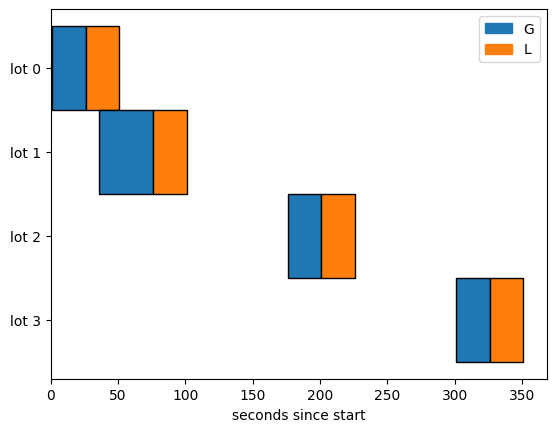

In [23]:
# =================================
# Draw the lot-time-diagram
# =================================

# Set the locations
locations = ('G', 'L')

# For each lot, give the entry and exit times at respectively the generator G and lift L.
# The first lot is given as an example.
lot0 = { 'G':[  1,    26],   'L':[  26,   51] };
lot1 = { 'G':[ 36,    76],   'L':[  76,  101] };
lot2 = { 'G':[176,   201],   'L':[ 201,  226] };
lot3 = { 'G':[301,   326],   'L':[ 326,  351] };

# Add all lots together
lots = [lot0, lot1, lot2, lot3];

# Draw the lot-time diagram
#Following line is used to display figure in visual studio code
%matplotlib inline 
draw_lot_time_diagram(locations, lots)

b. 	Study the Lift in the simulation code below. Can you describe (in one sentence) what each of its channels, events, and entities represent?


Answer: 

    channel1: The channel used to inform the lift to which tier it needs to go
    channel2: The channel used to inform the lift that it has picked up the tote
    channel3: The channel used to inform the exit that the tote has been dropped off
    
    event1: The lift recieving the tier it needs to travel to
    event2: The lift traveling to the tier and picking up the tote
    event3: The generator informing the lift that the tote has left the generator
    event4: The lift traveling to the exit and dropping the tote
    event5: The lift informing the exit that the tote has left the lift
    
    entity1: The tier at which the tote needs to be picked up
    entity2: The time at which the lift recieves at what tier it needs to pick up a tote

In [24]:
# =================================
# Tote definition
# =================================
@dataclass
class Tote:
    entrytime: float = 0
    tier: int = 0

# =================================
# Generator
# =================================
@process
def Generator(env, c1, c2):
    delays=[1.0, 10.0, 100.0, 100.0]
    while len(delays)>0:
        yield env.timeout(delays[0])
        delays = delays[1:]
        tier = 1
        yield env.execute(c1.send(tier))
        print(f"Generator: Informed Lift to go to tier {tier} at time {env.now:3.1f}");
        x = Tote(entrytime = env.now, tier = tier)
        yield env.execute(c2.send(x))
        print(f"Generator: Tote has completely left the Generator and entered "
              f"the Lift at time {env.now:3.1f}")
    yield env.timeout(100.0)


# =================================
# Lift
# =================================
@process
def Lift(env, channel1, channel2, channel3, ll):
    while True:
        
        event1 = channel1.receive()
        entity1 = yield env.execute(event1)
        
        event2 = env.timeout(23.0+ll)
        yield event2
        
        event3 = channel2.receive()
        entity2 = yield env.execute(event3)
        
        event4 = env.timeout(23.0+ll)
        yield event4

        event5 = channel3.send(entity2)
        yield env.execute(event5)
    
# =================================
# Exit 
# =================================
@process
def Exit(env, c_in):
    while True:
        x = yield env.execute(c_in.receive())
        print(f"Exit: Tote has completely left the Lift and has been received "
              f"by the Exit at time {env.now:3.1f}");

# =================================
# Model
# =================================
def model():
    # Variables
    ll = 2.0  # time to load/unload the lift
    
    env = Environment()
    a = Channel(env)
    b = Channel(env)
    c = Channel(env)
    G = Generator(env, a, b)
    L = Lift(env, a, b, c, ll)
    E = Exit(env, c)
    env.run()
    print ("simulation has ended")

# =================================
# Main
# =================================
model()

Generator: Informed Lift to go to tier 1 at time 1.0
Generator: Tote has completely left the Generator and entered the Lift at time 26.0
Generator: Informed Lift to go to tier 1 at time 51.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 51.0
Generator: Tote has completely left the Generator and entered the Lift at time 76.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 101.0
Generator: Informed Lift to go to tier 1 at time 176.0
Generator: Tote has completely left the Generator and entered the Lift at time 201.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 226.0
Generator: Informed Lift to go to tier 1 at time 301.0
Generator: Tote has completely left the Generator and entered the Lift at time 326.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 351.0
simulation has ended


## 6.6 Exercise 6: Buffer with multiple tiers (10 points)
Every tier has a buffer location of finite capacity $bc$. In this exercise, these parallel finite buffer locations are modelled as one Buffer model.

a. Study the simulation code below. Can you describe (concisely) why the events of the buffer are modelled the way they are:

    events1: This event occurs when a product is generated at one of the levels, therefore it is modeled as a list of events containing a channel.receive() to receive a product through channel 1 of the corresponding level, because a product can be placed in a buffer at the same time in multiple levels
    event2: This is a single event containing a channel.send(), because this events is for communication with the lift, of which there is only one.
    event3: For the same reason as event2, this is a single event containing a channel.send()

and can you explain what happens when an event occurs:

    events1: When this event occurs, the generator sends a product to the buffer, and the buffer stores the information of this product. 
    event2: When this event occurs, the lift travels to the correct tier. 
    event3: When this occurs, a product is send from the buffer to the lift and the information about the product is removed from the buffer

In [25]:
# =================================
# Generator
# =================================
@process
def Generator(env, c_out, tier):
    delays=[1.0*tier, 10.0, 100.0, 100.0]
    while len(delays)>0:
        yield env.timeout(delays[0])
        delays = delays[1:]
        x = Tote(entrytime = env.now, tier = tier)
        yield env.execute(c_out.send(x))
        print(f"Generator {tier:d}: Sending tote to Buffer completed at "
              f"time {env.now:3.1f}")
    yield env.timeout(100.0)
    
# =================================
# Buffer
# =================================
@process
def Buffer(env, channels1, channel2, channel3, bc, Levels):
    xs = []
    n = [0] * Levels
    lift_called = False
    while True:
        # Define events
        events1 = [channels1[tier].receive() if n[tier] < bc else None for tier in range(Levels)]
        if not lift_called:
            event3 = None
            if len(xs) > 0:
                x_sending = xs[0]
                event2 = channel2.send(x_sending.tier)
            else:
                event2 = None
        else:
            event2 = None
            event3 = channel3.send(x_sending)
        
        # Execute one of the events
        events = events1  + [event2] + [event3]
        yield env.select(*events)    
        
        # Check which event is executed
        for tier in range(Levels):
            if selected(events1[tier]):
                x_received = events1[tier].entity
                xs = xs + [x_received]
                n[tier] = n[tier] + 1
            
        if selected(event2):
            lift_called = True
           
        if selected(event3):
            xs = xs[1:]
            n[x_sending.tier] = n[x_sending.tier] - 1
            lift_called = False
            
            
# =================================
# Model
# =================================
def model():
    # Variables
    ll = 2.0  # time to load/unload the lift
    bc = 1    # buffer capacity
    Levels = 2 # the number of tiers
    
    env = Environment()
    a = [Channel(env) for tier in range(Levels)]
    b = Channel(env)
    c = Channel(env)
    d = Channel(env)
    Gs = [Generator(env, a[tier], tier) for tier in range(Levels)] 
    B = Buffer(env, a, b, c, bc, Levels)
    L = Lift(env, b, c, d, ll)
    E = Exit(env, d)
    env.run(until=10000000)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()

Generator 0: Sending tote to Buffer completed at time 0.0
Generator 1: Sending tote to Buffer completed at time 1.0
Generator 0: Sending tote to Buffer completed at time 25.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 50.0
Generator 1: Sending tote to Buffer completed at time 75.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 100.0
Generator 0: Sending tote to Buffer completed at time 125.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 150.0
Generator 1: Sending tote to Buffer completed at time 175.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 200.0
Generator 0: Sending tote to Buffer completed at time 225.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 250.0
Generator 1: Sending tote to Buffer completed at time 275.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 300.0

b. Consider two tiers ($Levels = 2$), and assume that for tier $i \in \{0, Levels - 1\}$ the first tote arrives after $i$ seconds (for two tiers: after 0.0 for tier 0 and after 1.0 for tier 1). Subsequently a tote arrives respectively 10.0, 100.0, and 100.0 seconds after the completion of sending its predecessor to the buffer. Make a lot-time-diagram indicating how long a newly generated job spends in which Generator (G0 or G1), in the Buffer, and spends in the Lift. 

Answer: 

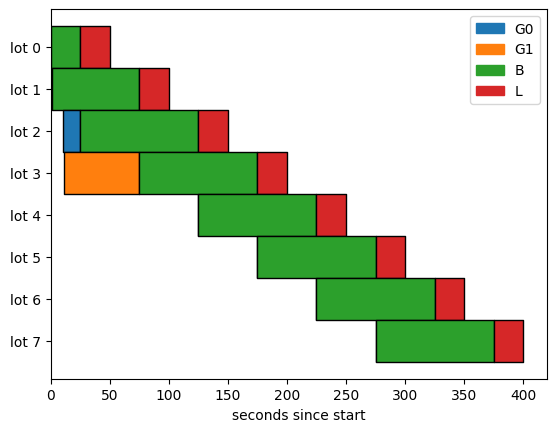

In [26]:
# =================================
# Draw the lot-time-diagram
# =================================

# Set the locations
locations = ('G0', 'G1', 'B', 'L')

# For each lot, give the entry and exit times at generators G0 and G1, the buffer B, and lift L.
lot0 = {'G0':[  0,  0], 'B':[  0, 25], 'L':[ 25, 50]};
lot1 = {'G1':[  1,  1], 'B':[  1, 75], 'L':[ 75,100]};
lot2 = {'G0':[ 10, 25], 'B':[ 25,125], 'L':[125,150]};
lot3 = {'G1':[ 11, 75], 'B':[ 75,175], 'L':[175,200]};
lot4 = {'G0':[125,125], 'B':[125,225], 'L':[225,250]};
lot5 = {'G1':[175,175], 'B':[175,275], 'L':[275,300]};
lot6 = {'G0':[225,225], 'B':[225,325], 'L':[325,350]};
lot7 = {'G1':[275,275], 'B':[275,375], 'L':[375,400]};

# Add all lots together
lots = [lot0, lot1, lot2, lot3, lot4, lot5, lot6, lot7];

# Draw the lot-time diagram
draw_lot_time_diagram(locations, lots)

c. Suppose that we want the system to be able to handle priority orders, can you modify the Buffer model to make the lift pick up totes with higher priority first? The generator generates totes with a `tote.priority` property, for which priority 1 is high priority, and priority 2 is low priority. Only the Buffer model needs to be modified, the Tote, Generator and Exit models have already been modified. Give the model of the buffer, and the output log when you run it to show that the buffer is modelled correctly.

**Note: in the exercise 6.7 onwards, the Buffer without priorities will be used.**

In [27]:
# =================================
# Tote definition
# =================================
@dataclass
class Tote:
    entrytime: float = 0
    tier: int = 0
    priority: int = 0
        
# =================================
# Generator
# =================================
@process
def Generator(env, c_out, tier):
    delays=[1.0*tier, 1.0, 1.0, 1.0]
    priorities=[2, tier+1, tier+1, 1]
    while len(delays)>0:
        yield env.timeout(delays[0])
        delays = delays[1:]
        priority = priorities[0]
        priorities = priorities[1:]
        x = Tote(entrytime = env.now, tier = tier, priority = priority)
        yield env.execute(c_out.send(x))
        print(f"Generator {tier:d}: Sending tote with priotity {priority} to Buffer completed at "
              f"time {env.now:3.1f}")
    yield env.timeout(100.0)
    
# =================================
# Buffer
# =================================
def insert_product(xs, new_product):
    if (new_product.priority == 2):
        return xs + [new_product]
    
    insert_index = 0
    for index, product in enumerate(xs):
        if (product.priority == 2):
            insert_index = index
            break

    new_xs = xs
    new_xs.insert(insert_index, new_product)
    return new_xs

@process
def Buffer(env, channels1, channel2, channel3, bc, Levels):
    xs = []
    n = [0] * Levels
    lift_called = False
    while True:
        # Define events
        events1 = [channels1[tier].receive() if n[tier] < bc else None for tier in range(Levels)]
        if not lift_called:
            event3 = None
            print(xs)
            if len(xs) > 0:
                x_sending = xs[0]
                event2 = channel2.send(x_sending.tier)
            else:
                event2 = None
        else:
            event2 = None
            event3 = channel3.send(x_sending)
        
        # Execute one of the events
        events = events1  + [event2] + [event3]
        yield env.select(*events)    
        
        # Check which event is executed
        for tier in range(Levels):
            if selected(events1[tier]):
                x_received = events1[tier].entity
                xs = insert_product(xs, x_received)
                n[tier] = n[tier] + 1
            
        if selected(event2):
            lift_called = True
           
        if selected(event3):
            xs = xs[1:]
            n[x_sending.tier] = n[x_sending.tier] - 1
            lift_called = False
            print(f"Buffer: Tote with priority {x_sending.priority} was transfered from Buffer to Lift at time {env.now:3.1f}")

# =================================
# Exit 
# =================================
@process
def Exit(env, c_in):
    while True:
        x = yield env.execute(c_in.receive())
        print(f"Exit: Tote with priority {x.priority} has completely left the Lift and has been received "
              f"by the Exit at time {env.now:3.1f}");            
            
# =================================
# Model
# =================================
def model():
    # Variables
    ll = 2.0  # time to load/unload the lift
    bc = 1    # buffer capacity
    Levels = 2 # the number of tiers
    
    env = Environment()
    a = [Channel(env) for tier in range(Levels)]
    b = Channel(env)
    c = Channel(env)
    d = Channel(env)
    Gs = [Generator(env, a[tier], tier) for tier in range(Levels)] 
    B = Buffer(env, a, b, c, bc, Levels)
    L = Lift(env, b, c, d, ll)
    E = Exit(env, d)
    env.run(until=10000000)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()

[]
Generator 0: Sending tote with priotity 2 to Buffer completed at time 0.0
[Tote(entrytime=0.0, tier=0, priority=2)]
Generator 1: Sending tote with priotity 2 to Buffer completed at time 1.0
Buffer: Tote with priority 2 was transfered from Buffer to Lift at time 25.0
[Tote(entrytime=1.0, tier=1, priority=2)]
Generator 0: Sending tote with priotity 1 to Buffer completed at time 25.0
[Tote(entrytime=1.0, tier=0, priority=1), Tote(entrytime=1.0, tier=1, priority=2)]
Exit: Tote with priority 2 has completely left the Lift and has been received by the Exit at time 50.0
Buffer: Tote with priority 1 was transfered from Buffer to Lift at time 75.0
[Tote(entrytime=1.0, tier=1, priority=2)]
Generator 0: Sending tote with priotity 1 to Buffer completed at time 75.0
[Tote(entrytime=26.0, tier=0, priority=1), Tote(entrytime=1.0, tier=1, priority=2)]
Exit: Tote with priority 1 has completely left the Lift and has been received by the Exit at time 100.0
Buffer: Tote with priority 1 was transfered f

## 6.7 Exercise 7: Lift accurately modelled (5 points)

Assume that the Lift starts from the ground floor. If it has to go to tier $i \in \{0, Levels - 1\}$, it needs to travel a
distance $dl \cdot (i + 1)$, pick up the tote, travel back, and deliver the tote at the ground floor. For traveling the required distance, the vehicle first goes with a constant acceleration $al$ *m/s$^2$* until it reaches its maximum velocity $vmaxl$, then it moves with this velocity and decelerates with a constant deceleration $al$ to approach its destination tier. If the tier is located too close to the ground floor, it is possible that the Lift will not reach its maximum speed. Loading and unloading a tote both take $ll$ seconds.

**Note: from here onwards, the Buffer without priorities will be used.**

a. The time the lift is moving can be calculated similarly to how it was done for the vehicle in Exercise 4. Note that it takes the Lift half the time to move to pick the tote up, and then half the time to move back to drop the tote off. Using this information, determine (analytically) the time $t_{total}(i)$ it takes the Lift to pick up and drop off the item in terms of $ i $, $ dl $, $ al $, $ ll $, and $ vmaxl $.


Answer: ...

$
t_{total}(i) =
    \begin{cases}
      2*(2*\sqrt{\frac{dl*(i+1)}{2*al}} + ll) \ , & \text{for} \ dl*(i+1) \leq \ \frac{vmaxl^2}{al} \ , \\
      2*(\frac{vmaxl}{al}+\frac{dl*(i+1)}{vmaxl} + ll) \ , & \text{for} \ dl*(i+1) >    \ \frac{vmaxl^2}{al} \ .
    \end{cases}
$


b. Consider two tiers ($Levels = 2$), and assume that for tier $i \in \{0, Levels - 1\}$ the first tote arrives after $i$ seconds (for two tiers: after 0.0 for tier 0 and after 1.0 for tier 1). Subsequently a tote arrives respectively 10.0, 100.0, and 100.0 seconds after the completion of sending its predecessor to the buffer. Make a lot-time-diagram indicating how long a newly generated job spends in which Generator, in the Buffer, and spends in the Lift.

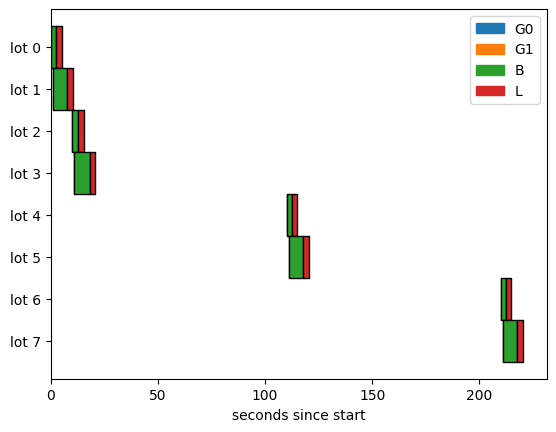

In [28]:
# =================================
# Draw the lot-time-diagram
# =================================

# Set the locations
locations = ('G0', 'G1', 'B', 'L')

# For each lot, give the entry and exit times at generators G0 and G1, the buffer B, and lift L.
lot0 = {'G0':[    0,    0], 'B':[    0,  2.5], 'L':[  2.5,    5]};
lot1 = {'G1':[    1,    1], 'B':[    1,  7.7], 'L':[  7.7, 10.4]};
lot2 = {'G0':[   10,   10], 'B':[   10, 12.9], 'L':[ 12.9, 15.4]};
lot3 = {'G1':[   11,   11], 'B':[   11, 18.1], 'L':[ 18.1, 20.8]};
lot4 = {'G0':[  110,  110], 'B':[  110,112.5], 'L':[112.5,  115]};
lot5 = {'G1':[  111,  111], 'B':[  111,117.7], 'L':[117.7,120.4]};
lot6 = {'G0':[  210,  210], 'B':[  210,212.5], 'L':[212.5,  215]};
lot7 = {'G1':[  211,  211], 'B':[  211,217.7], 'L':[217.7,220.4]};

# Add all lots together
lots = [lot0, lot1, lot2, lot3, lot4, lot5, lot6, lot7];

# Draw the lot-time diagram
draw_lot_time_diagram(locations, lots)

c. Complete the Lift in the simulation code in the template below, and confirm that your simulations produce the correct results, i.e., in correspondence with your lot-time-diagram.

In [29]:
# =================================
# Tote definition
# =================================
@dataclass
class Tote:
    entrytime: float = 0
    tier: int = 0

# =================================
# Generator
# =================================
@process
def Generator(env, c_out, tier):
    delays=[1.0*tier, 10.0, 100.0, 100.0]
    while len(delays)>0:
        yield env.timeout(delays[0])
        delays = delays[1:]
        x = Tote(entrytime = env.now, tier = tier)
        yield env.execute(c_out.send(x))
        print(f"Generator {tier:d}: Sending tote to Buffer completed at "
              f"time {env.now:3.1f}")
    yield env.timeout(100.0)

# =================================
# Lift
# =================================
@process
def Lift(env, channel1, channel2, channel3, ll, dl, vmaxl, al):
    while True:
        
        event1 = channel1.receive()
        entity1 = yield env.execute(event1)

        i = entity1

        if dl*(i+1) <= vmaxl**2/al:
            t_total=4*sqrt(((dl*(i+1))/2)/al) + 2*ll
        else:
            t_total=2*(vmaxl/al+(dl*(i+1))/vmaxl) + 2*ll
        
        event2 = env.timeout(t_total/2)
        yield event2
        
        event3 = channel2.receive()
        entity2 = yield env.execute(event3)
        
        event4 = env.timeout(t_total/2)
        yield event4
        
        event5 = channel3.send(entity2)
        yield env.execute(event5)

# =================================
# Buffer
# =================================
@process
def Buffer(env, channels1, channel2, channel3, bc, Levels):
    xs = []
    n = [0] * Levels
    lift_called = False
    while True:
        # Define events
        events1 = [channels1[tier].receive() if n[tier] < bc else None for tier in range(Levels)]
        if not lift_called:
            event3 = None
            if len(xs) > 0:
                x_sending = xs[0]
                event2 = channel2.send(x_sending.tier)
            else:
                event2 = None
        else:
            event2 = None
            event3 = channel3.send(x_sending)
        
        # Execute one of the events
        events = events1  + [event2] + [event3]
        yield env.select(*events)    
        
        # Check which event is executed
        for tier in range(Levels):
            if selected(events1[tier]):
                x_received = events1[tier].entity
                xs = xs + [x_received]
                n[tier] = n[tier] + 1
            
        if selected(event2):
            lift_called = True
           
        if selected(event3):
            xs = xs[1:]
            n[x_sending.tier] = n[x_sending.tier] - 1
            lift_called = False

@process
def Exit(env, c_in):
    while True:
        x = yield env.execute(c_in.receive())
        print(f"Exit: Tote has completely left the Lift and has been received "
                 f"by the Exit at time {env.now:3.1f}")

# =================================
# Model
# =================================
def model():
    # Variables
    ll = 2.0        # time to load/unload the lift
    bc = 1          # buffer capacity
    Levels = 2      # the number of tiers
    dl = 0.8        # unit height clearance
    vmaxl = 5.0     # maximum velocity of lift
    al = 7.0        # acceleration/deceleration of lift
    
    env = Environment()
    a = [Channel(env) for tier in range(Levels)] # a channel for each tier, each sending totes
    b = Channel(env)  # for sending totes
    c = Channel(env)  # for calling the lift
    d = Channel(env)  # for sending totes
    Gs = [Generator(env, a[tier], tier) for tier in range(Levels)] 
    B = Buffer(env, a, b, c, bc, Levels)
    L = Lift(env, b, c, d, ll, dl, vmaxl, al)
    E = Exit(env, d)
    env.run()
    print ("simulation has ended")

    
# =================================
# Main
# =================================
model()

Generator 0: Sending tote to Buffer completed at time 0.0
Generator 1: Sending tote to Buffer completed at time 1.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 5.0
Generator 0: Sending tote to Buffer completed at time 10.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 10.3
Generator 1: Sending tote to Buffer completed at time 11.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 15.3
Exit: Tote has completely left the Lift and has been received by the Exit at time 20.6
Generator 0: Sending tote to Buffer completed at time 110.0
Generator 1: Sending tote to Buffer completed at time 111.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 115.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 120.3
Generator 0: Sending tote to Buffer completed at time 210.0
Generator 1: Sending tote to Buffer completed at time 211.0
Exi

## 6.8 Exercise 8: Entire system (10 points)
In the previous exercises we developed and tested each process individually. Now it is time to combine all processes into one model.

a. Determine the (total) arrival rate of orders for a system with $Levels$ tiers, where for each tier orders arrive with a mean inter arrival time of $arrive$.

Answer: For a system with $Levels$ tiers, the arrival rate is the sum of the mean arrival rate of the individual tiers.
$$Arrival \ rate = Levels \cdot 1 / arrive = 9/70 \approx 0.1286



b. Complete the simulation code in the template below by substituting the code for the processes as you derived in Exercises 1, 2, 4, 6, and 7. Note that the type tote has been extended in comparison with Exercise 1, so extra code is required in the Generator process to include the tier.

Verify that the throughput in your simulations matches with the start rate you determined. Verify that totes reach the exit from each tier. Also verify that totes are generated from each column. Give the determined throughput and min and max values for column and tier.

If you were not able to complete the Vehicle and Lift models, you can use the simplified models from respectively Exercises 3 and 5, with a total processing time $t_{vehicle, total} = 10 + \frac{depth}{3}$ for the vehicle, and a total processing time $t_{lift, total} = 5 + \frac{Level}{5}$. You can do the same for the following exercises.

Answer: ...



In [30]:
# =================================
# Tote
# =================================
@dataclass
class Tote:
    entrytime: float = 0.0
    column: int = 0
    tier: int  = 0

        
# =================================
# Generator from Exercise 1 (modified to include tier) 
# =================================
@process
def Generator(env, c_out, arrive, depth, tier):
    global column, totes_entered #Variables to keep track of generation
    depth_distr = lambda: random.randint(0,depth)
    distribution = lambda : random.exponential(arrive)

    while True:
        column_chosen = depth_distr()
        x = Tote(entrytime = env.now, column = column_chosen, tier = tier)
        yield env.execute(c_out.send(x))
        totes_entered[tier] = totes_entered[tier] + 1 #Keep track of the number of totes entered
        columns[column_chosen] = columns[column_chosen] + 1 #Keep track of in which column totes are generated

        delay = distribution()
        yield env.timeout(delay)

        
# =================================
# Demand Buffer from Exercise 2
# =================================
@process
def Demand_Buffer(env, c_in, c_out):
    global totes_demand_buffer
    xs = [] # list of totes
    while True:
        sending = c_out.send(xs[0]) if len(xs)>0 else None
        receiving = c_in.receive()
        x = yield env.select(sending, receiving)
        if selected(receiving):
            xs = xs + [x]
            totes_demand_buffer[0] = totes_demand_buffer[0] + 1 #Keep track of the number of totes in a demand buffer
        if selected(sending):
            xs = xs[1:]
            totes_demand_buffer[0] = totes_demand_buffer[0] - 1 #Keep track of the number of totes in a demand buffer

    
# =================================
# Vehicle from Exercise 4
# =================================
@process
def Vehicle(env, c_in, c_out, lv, dv, vmaxv, av):
    global totes_vehicle
    while True:
        x = yield env.execute(c_in.receive())
        totes_vehicle[x.tier] = totes_vehicle[x.tier] + 1 #Keep track of the number of totes on vehicles
        i = x.column
        
        if dv*(i+1) <= vmaxv**2/av:
            t_total=2*sqrt((4*dv*(i+1))/av) + 2*lv
        else:
            t_total=2*(vmaxv/av + (dv*(i+1))/vmaxv) + 2*lv

        yield env.timeout(t_total)
        yield env.execute(c_out.send(x))
        totes_vehicle[x.tier] = totes_vehicle[x.tier] - 1 #Keep track of the number of totes on vehicles

    
# =================================
# Lift from Exercise 7
# =================================
@process
def Lift(env, channel1, channel2, channel3, ll, dl, vmaxl, al):
    while True:
        
        event1 = channel1.receive()
        entity1 = yield env.execute(event1)

        i = entity1

        if dl*(i+1) <= vmaxl**2/al:
            t_total=4*sqrt(((dl*(i+1))/2)/al) + 2*ll
        else:
            t_total=2*(vmaxl/al+(dl*(i+1))/vmaxl) + 2*ll
        
        event2 = env.timeout(t_total/2)
        yield event2
        
        event3 = channel2.receive()
        entity2 = yield env.execute(event3)
        
        event4 = env.timeout(t_total/2)
        yield event4
        
        event5 = channel3.send(entity2)
        yield env.execute(event5)

    
# =================================
# Buffer from Exercise 6a
# =================================
@process
def Buffer(env, channels1, channel2, channel3, bc, Levels):
    global totes_buffer, totes_left
    xs = []
    n = [0] * Levels
    lift_called = False
    while True:
        # Define events
        events1 = [channels1[tier].receive() if n[tier] < bc else None for tier in range(Levels)]
        if not lift_called:
            event3 = None
            if len(xs) > 0:
                x_sending = xs[0]
                event2 = channel2.send(x_sending.tier)
            else:
                event2 = None
        else:
            event2 = None
            event3 = channel3.send(x_sending)
        
        # Execute one of the events
        events = events1  + [event2] + [event3]
        yield env.select(*events)    
        
        # Check which event is executed
        for tier in range(Levels):
            if selected(events1[tier]):
                x_received = events1[tier].entity
                xs = xs + [x_received]
                n[tier] = n[tier] + 1
                totes_buffer[tier] = totes_buffer[tier] + 1 #Store the buffer information in a global variable to print later

            
        if selected(event2):
            lift_called = True
           
        if selected(event3):
            xs = xs[1:]
            n[x_sending.tier] = n[x_sending.tier] - 1
            lift_called = False
            totes_left[x_sending.tier] = totes_left[x_sending.tier] + 1 #Keep track of the number of totes that leave a tier
            totes_buffer[x_sending.tier] = totes_buffer[x_sending.tier] - 1 #Store the buffer information in a global variable to print later



      
    
# =================================
# Exit
# =================================
@process
def Exit(env, c_in, number_of_orders):
    mphi = 0.0
    for i in range(1, number_of_orders + 1):
        x = yield env.execute(c_in.receive())
        mphi = (i - 1) / i * mphi + (env.now - x.entrytime) / i
        mthi = i/env.now
    return mphi, mthi 


        
# =================================
# GDV Submodel (Generator + DemandBuffer  + Vehicle)
# =================================
def GDV(env, c_out, arrive, depth, tier, lv, dv, vmaxv, av):
    a = Channel(env)
    b = Channel(env)
    G = Generator(env, a, arrive, depth, tier)
    D = Demand_Buffer(env, a, b)
    V = Vehicle(env, b, c_out, lv, dv, vmaxv, av)

    
# =================================
# Model
# =================================
def model(Levels, depth, arrive, bc, number_of_orders):
    # Variables
    lv = 3.0                   # time to load/unload the vehicle
    dv = 0.5                   # unit width clearance
    vmaxv = 1.5                # maximum velocity of the vehicle
    av = 1.0                   # acceleration/deceleration of the vehicle
    ll = 2.0                   # time to load/unload the lift
    dl = 0.8                   # unit height clearance
    vmaxl = 5.0                # maximum velocity of lift
    al = 7.0                   # acceleration/deceleration of lift
    
    env = Environment()
    c = [Channel(env) for tier in range(Levels)] 
    d = Channel(env)  
    e = Channel(env)  
    f = Channel(env)  
    GDVs = [ GDV(env, c[tier], arrive, depth, tier, lv, dv, vmaxv, av)  for tier in range(Levels) ] 
    B = Buffer(env, c, d, e, bc, Levels)
    L = Lift(env, d, e, f, ll, dl, vmaxl, al)
    E = Exit(env, f, number_of_orders)
    env.run(until=E)
    mph, mth = E.value
    return mph, mth


# =================================
# Experiment
# =================================
def experiment(Levels, depth, arrive, number_of_orders, bc, debug_output):
    global totes_entered, totes_left, totes_buffer, totes_vehicle, totes_demand_buffer, columns

    # Variables to verify correct operation
    totes_entered = [0]*Levels #Array to store number of totes entered in each tier
    totes_left = [0]*Levels #Array to store number of totes that have left each tier
    totes_buffer = [0]*Levels #Number of totes that are in the buffer in each tier
    totes_vehicle = [0]*Levels #Array to store the number of totes on a vehicle in each tier
    totes_demand_buffer = [0] #The number of totes in a demand buffer
    columns = [0]*depth #Array to store in which columns totes were generated
    
    print(f"--- Experiment {e}: For Levels={Levels}, depth={depth}, arrive={arrive}, bc={bc}, number_of_orders={number_of_orders} --- ")
    mph, mth = model(Levels, depth, arrive, bc, number_of_orders)

    if (debug_output):
        print(f"--- Experiment {e}: Mean throughput = {mth:8.6f}; Mean flowtime = {mph:6.4f} ---")
        print(f"Number of totes entered per tier: " + str(totes_entered))
        print(f"Number of totes left per tier: " + str(totes_left))
        print(f"Number of totes currently on vehicles: " + str(totes_vehicle))
        print(f"Totes currently in the buffer: " + str(totes_buffer))

        #Determine the difference 
        totes_difference = []
        for i in range(Levels):
            totes_difference.append(totes_entered[i] - totes_left[i] - totes_buffer[i] - totes_vehicle[i])

        print(f"In - (out + vehicle + buffer): " + str(totes_difference))
        print(f"Totes currently in the demand buffer: " + str(totes_demand_buffer))
        print(f"Totes generated per column: " + str(columns))
    

    return mph, mth #Return the mean flow time and throughput to analyze later

    
# =================================
# Main
# =================================
Levels = 9                # the number of tiers
depth  = 55               # the number of columns
arrive = 70.0             # inter arrival time of requests
number_of_orders = 10000  # the number of orders to process 
bc = 1                    # buffer capacity
experiment(Levels, depth, arrive, number_of_orders, bc, debug_output=True)

--- Experiment 2.718281828459045: For Levels=9, depth=55, arrive=70.0, bc=1, number_of_orders=10000 --- 
--- Experiment 2.718281828459045: Mean throughput = 0.129080; Mean flowtime = 64.0244 ---
Number of totes entered per tier: [1086, 1128, 1148, 1109, 1096, 1151, 1080, 1080, 1126]
Number of totes left per tier: [1085, 1128, 1147, 1109, 1096, 1150, 1080, 1079, 1126]
Number of totes currently on vehicles: [1, 0, 1, 0, 0, 1, 0, 0, 0]
Totes currently in the buffer: [0, 0, 0, 0, 0, 0, 0, 1, 0]
In - (out + vehicle + buffer): [0, 0, 0, 0, 0, 0, 0, 0, 0]
Totes currently in the demand buffer: [0]
Totes generated per column: [180, 181, 189, 186, 187, 194, 180, 171, 198, 189, 192, 151, 188, 186, 173, 213, 180, 188, 193, 182, 203, 199, 183, 191, 174, 193, 186, 183, 163, 186, 183, 170, 197, 167, 178, 161, 184, 160, 184, 201, 188, 185, 196, 175, 183, 163, 189, 180, 158, 174, 164, 185, 143, 189, 185]


(64.02441724768369, 0.12908021476410056)

The mean throughput matches the analytical value determined in 6.8a. The average calculated in 6.8c equals 0.12879279999999996, which is only 0.17% off.

To validate that all totes reach the exit of each tier, the number of totes that has left and entered has been printed per level. To account for the difference between in and out, the number of totes on a vehicle or in a buffer has been plotted too. Because the number of totes in a demand buffer could not be counted per level, it has been printed separately. The number of totes entered on a level minus the totes left always exactly equal the number of totes that are currently still present in a level. Therefore we can conclude that all totes reach the exit of their level. 

From the prints of the totes entered and left per tier we can also clearly see that totes are generated on each tier. An extra line was printed showing how many totes were generated for each column number. The list is 55 long and always has non zero entries on each location, which means that totes are generated in each column. 


c. Run your simulation 30 times, and record for each run the resulting average throughput and average flow time.
Determine the mean and the standard deviation of both the average throughput and the average flow time for these 30 simulations. Finally, determine a 95% confidence interval for both the average throughput and the average flow time. Give the results as your answer.

Answer: ...



In [31]:

#results of 30 runs for bc = 1
average_throughput = [0.127080,0.130903,0.128091,0.128845,0.129709,0.130299,0.127840,0.128343,0.128509,0.127000,
                        0.128128,0.129973,0.128938,0.131020,0.127645,0.129076,0.130463,0.127064,0.128517,0.128479,
                        0.131585,0.129234,0.128622,0.128825,0.129702,0.128658,0.128134,0.127434,0.127359,0.128309]
average_flowtime = [61.6915,63.5156,62.0522,63.6179,68.9142,62.0040,62.4015,64.0007,63.2022,59.9003,
                    61.9696,63.8118,63.7163,63.9639,62.8531,63.6727,65.8405,64.0115,61.9528,61.4654,
                    66.4982,64.1093,64.8780,60.9378,66.2466,59.7861,62.0523,62.1165,60.0397,61.6889]

#for bc = 2
#average_throughput = [0.128025,0.129135,0.129441,0.130134,0.126828,0.128430,0.128219,0.129470,0.128714,0.128829,
#                      0.130118,0.129601,0.127719,0.127728,0.128149,0.129644,0.130205,0.129184,0.129607,0.129733,
#                      0.126748,0.127779,0.130456,0.125946,0.127108,0.126200,0.128530,0.129930,0.128914,0.130429]
#average_flowtime = [61.8559,59.1882,64.0395,65.0466,58.6414,62.3563,64.0589,63.0705,63.3860,62.3697,
#                    63.5109,63.9103,60.2150,61.3896,62.7374,64.4456,64.9010,66.1792,62.8786,64.0067,
#                    60.4865,60.9720,64.3187,58.4947,61.4207,58.4914,64.8288,68.7042,62.8818,64.8375]

#for bc = 3
#average_throughput = [0.128631,0.128606,0.130302,0.127447,0.128863,0.128284,0.127966,0.129029,0.126861,0.130531,
#                       0.126119,0.129098,0.129311,0.128905,0.128594,0.126868,0.127962,0.128253,0.129676,0.126858,
#                       0.126861,0.128511,0.129687,0.130464,0.126801,0.128882,0.129490,0.129701,0.128364,0.130462]
#average_flowtime = [67.0425,61.9581,67.2207,61.2536,61.0354,60.2796,61.7171,64.7888,59.7121,63.7892,
#                     58.2584,60.9677,64.6193,62.0827,60.4760,60.0601,59.8425,65.7928,62.5313,60.7630,
#                     59.1919,64.1331,62.4908,62.3756,61.0526,64.9955,63.3952,61.4568,62.9209,63.2064]

#for bc = 200
#average_throughput = [0.131210,0.130318,0.127298,0.129473,0.127745,0.129362,0.129781,0.128908,0.128574,0.128950,
#                       0.128425,0.126536,0.126991,0.128855,0.129655,0.129550,0.129560,0.129801,0.128247,0.129184,
#                       0.129398,0.128666,0.129076,0.127001,0.127121,0.130958,0.127142,0.128976,0.128973,0.129853]
#average_flowtime = [67.0407,62.5729,60.4150,62.1112,60.9814,64.7519,63.7822,63.8979,63.1581,60.7939,
#                     61.9487,59.8640,60.5464,63.2333,68.0332,61.2870,63.6764,67.7502,61.5309,65.0643,
#                     64.8906,63.6374,63.4156,60.3151,60.2428,67.0888,60.9202,61.5282,64.3144,66.5087]
    
mean_average_throughput = sum(average_throughput)/len(average_throughput)
mean_average_flowtime = sum(average_flowtime)/len(average_flowtime)

throughput_deviation_from_mean_squared = [(x - mean_average_throughput)**2 for x in average_throughput]
flowtime_deviation_from_mean_squared = [(x - mean_average_flowtime)**2 for x in average_flowtime]

variance_average_throughput = sum(throughput_deviation_from_mean_squared)/(len(average_throughput)-1)
variance_average_flowtime = sum(flowtime_deviation_from_mean_squared)/(len(average_flowtime)-1)

sd_average_throughput = sqrt(variance_average_throughput)
sd_average_flowtime = sqrt(variance_average_flowtime)

# 95% confidence intervals
# For large enough times rerunning the model, the results will be normally distributed

z = 1.96 # z-value for the confidence level of 95%
throughput_confidence_interval_min = mean_average_throughput - z*sd_average_throughput/sqrt(len(average_throughput))
throughput_confidence_interval_max = mean_average_throughput + z*sd_average_throughput/sqrt(len(average_throughput))
flowtime_confidence_interval_min = mean_average_flowtime - z*sd_average_flowtime/sqrt(len(average_flowtime))
flowtime_confidence_interval_max = mean_average_flowtime + z*sd_average_flowtime/sqrt(len(average_flowtime))

print(f"Average throughput: Mean={mean_average_throughput}, Standard deviation={sd_average_throughput}, 95% confidence interval = [{throughput_confidence_interval_min} , {throughput_confidence_interval_max}]")
print(f"Average flow time: Mean={mean_average_flowtime}, Standard deviation={sd_average_flowtime}, 95% confidence interval =[{flowtime_confidence_interval_min} , {flowtime_confidence_interval_max}] ")


Average throughput: Mean=0.12879279999999996, Standard deviation=0.0012176554181053752, 95% confidence interval = [0.12835706760468701 , 0.1292285323953129]
Average flow time: Mean=63.097036666666675, Standard deviation=2.037683197684673, 95% confidence interval =[62.367861099084855 , 63.826212234248494] 


## 6.9 Exercise 9: Effect of buffer capacity (10 points)
Via computer simulation analyze the impact of the buffer capacity on the throughput and flow time (choose values of $bc$ as 1,2,3,200). For each setting, run your simulations 30 times and determine both mean and standard deviation of the resulting average throughput and average flow time for these 30 simulations, as well as 95% confidence intervals.

Please give your results, and describe your findings.

Answer:

Buffer capacity = 1:

Throughput: Mean=0.12879279999999996, Standard deviation=0.0012176554181053752, 95% confidence interval = [0.12835706760468701 , 0.1292285323953129]

Flow time: Mean=63.097036666666675, Standard deviation=2.037683197684673, 95% confidence interval =[62.367861099084855 , 63.826212234248494]

Buffer capacity = 2:

Throughput: Mean=0.1286984333333333, Standard deviation=0.0012685875850407546, 95% confidence interval = [0.12824447509615472 , 0.1291523915705119]

Flow time: Mean=62.78745333333333, Standard deviation=2.3762168876298877, 95% confidence interval =[61.93713504062532 , 63.63777162604134]

Buffer capacity = 3:

Throughput: Mean=0.12857956666666664, Standard deviation=0.0012173349263816036, 95% confidence interval = [0.12814394895784414 , 0.12901518437548914]

Flow time: Mean=62.313656666666674, Standard deviation=2.248200154404489, 95% confidence interval =[61.50914857360877 , 63.11816475972458]

Buffer capacity = 200:

Throughput: Mean=0.1288529, Standard deviation=0.0011768589506203227, 95% confidence interval = [0.12843176643308568 , 0.1292740335669143]

Flow time: Mean=63.17671333333333, Standard deviation=2.4028362271072194, 95% confidence interval =[62.31686943232954 , 64.03655723433712] 

Findings: For a higher buffer capacity the mean flow time decreases, yet for an 'unlimited' buffer capacity of 200 this mean flow time is roughly equal to this of the system with a buffer capacity of 1. The standard deviation of the flow time does increase when the capacity is set to 2, 3 and 200, compared to the standard deviation of a capacity of 1. 
The throughput stays roughly equal to the predicted throughput in 6.8a, because the mean number of orders that arrive stays the same. It can therefore be concluded that increasing the buffer capacity has a positive effect on the mean flow time, but only up to a certain level, the throughput is not influenced by the capacity of the buffer.


## 6.10 Exercise 10: Looking for the best layout (30 points)
Via computer simulation consider 6 different scenarios (see the table below) that correspond to different layouts of the
storage facility with a total capacity of 500 totes with different number of tiers and columns.

| Scenario | 1 | 2 | 3 | 4| 5 | 6 |
| - | - | - | - | - | - | - |
| Levels |  2 | 5 | 10 | 20 | 25 | 50 |
| Depth | 250 | 100 | 50 | 25 | 20 | 10 |

In order to obtain an answer to the questions below: for each scenario, run your simulations 30 times and determine both mean and standard deviation of the resulting average throughput and average flow time for these 30 simulations, as well as 95% confidence intervals.

In [32]:
scenario_levels = [2,5,10,20,25,50] # number of levels in different scenarios
scenario_depth = [250,100,50,25,10] # depth in different scenarios
n_scenarios = len(scenario_depth) # number of scenarios
n_sims = 3 # number of times to run the simulations for each scenario
arrive = 70.0             # inter arrival time of requests
number_of_orders = 10000  # the number of orders to process 
bc = 1                    # buffer capacity

# 2d lists to store the results of the different tests and scenarios
flow_time_list = []
throughput_list = []

for i in range(n_scenarios):
    flow_time_col = []
    throughput_col = []
    for j in range(n_sims):
        flow_time, throughput = experiment(scenario_levels[i], scenario_depth[i], arrive, number_of_orders, bc, debug_output=False)
        
        flow_time_col.append(flow_time)
        throughput_col.append(throughput)

    flow_time_list.append(flow_time_col)
    throughput_list.append(throughput_col)

print(str(flow_time_list))
print(str(throughput_list))

--- Experiment 2.718281828459045: For Levels=2, depth=250, arrive=70.0, bc=1, number_of_orders=10000 --- 
--- Experiment 2.718281828459045: For Levels=2, depth=250, arrive=70.0, bc=1, number_of_orders=10000 --- 
--- Experiment 2.718281828459045: For Levels=2, depth=250, arrive=70.0, bc=1, number_of_orders=10000 --- 
--- Experiment 2.718281828459045: For Levels=5, depth=100, arrive=70.0, bc=1, number_of_orders=10000 --- 
--- Experiment 2.718281828459045: For Levels=5, depth=100, arrive=70.0, bc=1, number_of_orders=10000 --- 
--- Experiment 2.718281828459045: For Levels=5, depth=100, arrive=70.0, bc=1, number_of_orders=10000 --- 
--- Experiment 2.718281828459045: For Levels=10, depth=50, arrive=70.0, bc=1, number_of_orders=10000 --- 
--- Experiment 2.718281828459045: For Levels=10, depth=50, arrive=70.0, bc=1, number_of_orders=10000 --- 
--- Experiment 2.718281828459045: For Levels=10, depth=50, arrive=70.0, bc=1, number_of_orders=10000 --- 
--- Experiment 2.718281828459045: For Levels=2

KeyboardInterrupt: 

a. Just changing the levels and depth, is not enough to determine the maximum achievable throughput of a design. Which parameter of the model should we change if we want to determine the maximum throughput?

 For each scenario, determine by means of simulation the maximal throughput.

What did you change in your model? Give your results including confidence intervals. What do you notice about the flowtime? Can you explain whats happening?


Answer: ...



b. Assume a required throughput of 6 totes per minute. Which of the given scenarios are feasible?

 Again, a change needs to be made to your model if we want to determine if the scenario can handle the required throughput. Modify your model, and compare the resulting flow time for each feasible scenario.

What did you change in your model? Give the results including confidence intervals.

Answer: ...



c. Based on your outcomes, select a layout that seems the best for you. The report on this step should contain an argument to select the best layout, and should consider if the layout is statistically significantly better than the other layouts. Can you think of other performance indicators that you could use to select the best layout besides the throughput and flow time?




Answer: ...



## References
[1] G. Marchet, M. Melanci, S. Perotti and E. Tappia, "Analytical model to estimate performance of autonomous vehicle storage and retrieval systems for product totes", International Journal of Production Research, vol. 50(24), 7134-7148, 2012.